In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [ ]:
from google.colab import files
files = files.upload()
df = pd.read_csv("jobs.csv")

Saving jobs.csv to jobs (1).csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job_id                    1553 non-null   int64  
 1   Job_title                 1553 non-null   object 
 2   Employement_num           1553 non-null   object 
 3   Employment_per_1000_jobs  1553 non-null   float64
 4   Median_hourly_wage        1455 non-null   object 
 5   Mean_hourly_wage          1475 non-null   object 
 6   Annual_mean_wage          1545 non-null   object 
 7   Job_Location              1553 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 97.2+ KB


In [ ]:
df.isnull().sum()

Job_id                       0
Job_title                    0
Employement_num              0
Employment_per_1000_jobs     0
Median_hourly_wage          98
Mean_hourly_wage            78
Annual_mean_wage             8
Job_Location                 0
dtype: int64

In [ ]:
df.head()

,Job_id,Job_title,Employement_num,Employment_per_1000_jobs,Median_hourly_wage,Mean_hourly_wage,Annual_mean_wage,Job_Location
0,1,Management Occupations,"89,09,910",63.242,$49.25,$59.31,"$123,370",Alabama
1,2,Top Executives,"32,29,990",22.926,$47.46,$57.94,"$120,520",Alabama
2,3,Chief Executives,"2,00,480",1.423,$86.31,$102.41,"$213,020",Alabama
3,4,General and Operations Managers,"29,84,920",21.187,$47.10,$55.41,"$115,250",Alabama
4,5,Legislators,"44,590",0.316,$30.64,$35.64,"$57,110",Alabama


In [ ]:
df

,Job_id,Job_title,Employement_num,Employment_per_1000_jobs,Median_hourly_wage,Mean_hourly_wage,Annual_mean_wage,Job_Location
0,1,Management Occupations,"89,09,910",63.242,$49.25,$59.31,"$123,370",Alabama
1,2,Top Executives,"32,29,990",22.926,$47.46,$57.94,"$120,520",Alabama
2,3,Chief Executives,"2,00,480",1.423,$86.31,$102.41,"$213,020",Alabama
3,4,General and Operations Managers,"29,84,920",21.187,$47.10,$55.41,"$115,250",Alabama
4,5,Legislators,"44,590",0.316,$30.64,$35.64,"$57,110",Alabama
...,...,...,...,...,...,...,...,...
1548,1547,Electrician,"7,40,830",5.258,$29.95,$34.00,"$70,720",Wisconsin
1549,1548,Pilot,440,0.003,$22.97,$26.16,"$54,400",Wisconsin
1550,1549,Investment Banker,"63,810",0.453,$37.03,$37.05,"$77,070",Wisconsin
1551,1550,Financial Advisor,"9,33,180",6.624,$39.43,$45.45,"$94,530",Wisconsin


In [ ]:
df["Mean_hourly_wage"] = df["Mean_hourly_wage"].str.replace('$',' ', regex=True)

In [ ]:
df["Median_hourly_wage"] = df["Median_hourly_wage"].str.replace('$',' ', regex=True)

In [ ]:
df["Annual_mean_wage"] = df["Annual_mean_wage"].str.replace('$',' ', regex=True)

In [ ]:
df["Annual_mean_wage"] = df["Annual_mean_wage"].str.replace("'","", regex=True)

In [ ]:
df


,Job_id,Job_title,Employement_num,Employment_per_1000_jobs,Median_hourly_wage,Mean_hourly_wage,Annual_mean_wage,Job_Location
0,1,Management Occupations,"89,09,910",63.242,49.25,59.31,"123,370",Alabama
1,2,Top Executives,"32,29,990",22.926,47.46,57.94,"120,520",Alabama
2,3,Chief Executives,"2,00,480",1.423,86.31,102.41,"213,020",Alabama
3,4,General and Operations Managers,"29,84,920",21.187,47.10,55.41,"115,250",Alabama
4,5,Legislators,"44,590",0.316,30.64,35.64,"57,110",Alabama
...,...,...,...,...,...,...,...,...
1548,1547,Electrician,"7,40,830",5.258,29.95,34.00,"70,720",Wisconsin
1549,1548,Pilot,440,0.003,22.97,26.16,"54,400",Wisconsin
1550,1549,Investment Banker,"63,810",0.453,37.03,37.05,"77,070",Wisconsin
1551,1550,Financial Advisor,"9,33,180",6.624,39.43,45.45,"94,530",Wisconsin


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy="mean")
df.Mean_hourly_wage=imputer.fit_transform(df['Mean_hourly_wage'].values.reshape(-1,1))[:,0]
df

,Job_id,Job_title,Employement_num,Employment_per_1000_jobs,Median_hourly_wage,Mean_hourly_wage,Annual_mean_wage,Job_Location
0,1,Management Occupations,"89,09,910",63.242,49.25,59.31,"123,370",Alabama
1,2,Top Executives,"32,29,990",22.926,47.46,57.94,"120,520",Alabama
2,3,Chief Executives,"2,00,480",1.423,86.31,102.41,"213,020",Alabama
3,4,General and Operations Managers,"29,84,920",21.187,47.10,55.41,"115,250",Alabama
4,5,Legislators,"44,590",0.316,30.64,35.64,"57,110",Alabama
...,...,...,...,...,...,...,...,...
1548,1547,Electrician,"7,40,830",5.258,29.95,34.00,"70,720",Wisconsin
1549,1548,Pilot,440,0.003,22.97,26.16,"54,400",Wisconsin
1550,1549,Investment Banker,"63,810",0.453,37.03,37.05,"77,070",Wisconsin
1551,1550,Financial Advisor,"9,33,180",6.624,39.43,45.45,"94,530",Wisconsin


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy="mean")
df.Median_hourly_wage=imputer.fit_transform(df['Median_hourly_wage'].values.reshape(-1,1))[:,0]
df

,Job_id,Job_title,Employement_num,Employment_per_1000_jobs,Median_hourly_wage,Mean_hourly_wage,Annual_mean_wage,Job_Location
0,1,Management Occupations,"89,09,910",63.242,49.25,59.31,"123,370",Alabama
1,2,Top Executives,"32,29,990",22.926,47.46,57.94,"120,520",Alabama
2,3,Chief Executives,"2,00,480",1.423,86.31,102.41,"213,020",Alabama
3,4,General and Operations Managers,"29,84,920",21.187,47.10,55.41,"115,250",Alabama
4,5,Legislators,"44,590",0.316,30.64,35.64,"57,110",Alabama
...,...,...,...,...,...,...,...,...
1548,1547,Electrician,"7,40,830",5.258,29.95,34.00,"70,720",Wisconsin
1549,1548,Pilot,440,0.003,22.97,26.16,"54,400",Wisconsin
1550,1549,Investment Banker,"63,810",0.453,37.03,37.05,"77,070",Wisconsin
1551,1550,Financial Advisor,"9,33,180",6.624,39.43,45.45,"94,530",Wisconsin


In [ ]:
df['Annual_mean_wage'] = df['Annual_mean_wage'].fillna(df['Annual_mean_wage'].mode()[0])

In [ ]:
df.isnull().sum()

Job_id                      0
Job_title                   0
Employement_num             0
Employment_per_1000_jobs    0
Median_hourly_wage          0
Mean_hourly_wage            0
Annual_mean_wage            0
Job_Location                0
dtype: int64

In [ ]:
df.head()

,Job_id,Job_title,Employement_num,Employment_per_1000_jobs,Median_hourly_wage,Mean_hourly_wage,Annual_mean_wage,Job_Location
0,1,Management Occupations,"89,09,910",63.242,49.25,59.31,"123,370",Alabama
1,2,Top Executives,"32,29,990",22.926,47.46,57.94,"120,520",Alabama
2,3,Chief Executives,"2,00,480",1.423,86.31,102.41,"213,020",Alabama
3,4,General and Operations Managers,"29,84,920",21.187,47.10,55.41,"115,250",Alabama
4,5,Legislators,"44,590",0.316,30.64,35.64,"57,110",Alabama


In [ ]:
df.corr()

,Job_id,Employment_per_1000_jobs,Median_hourly_wage,Mean_hourly_wage
Job_id,1.000000,0.071849,0.172512,0.099398
Employment_per_1000_jobs,0.071849,1.000000,0.012050,0.003446
Median_hourly_wage,0.172512,0.012050,1.000000,0.815823
Mean_hourly_wage,0.099398,0.003446,0.815823,1.000000


In [ ]:
corrMatrix = df.corr()

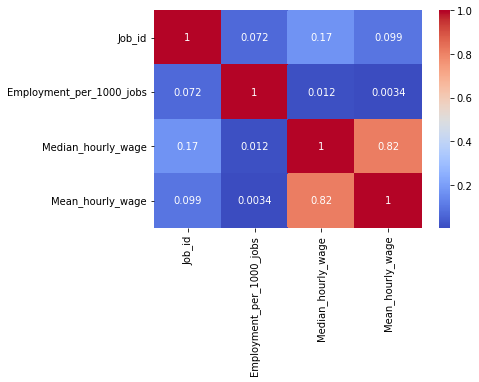

In [ ]:
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15a2b9fcd0>,
      dtype=object)

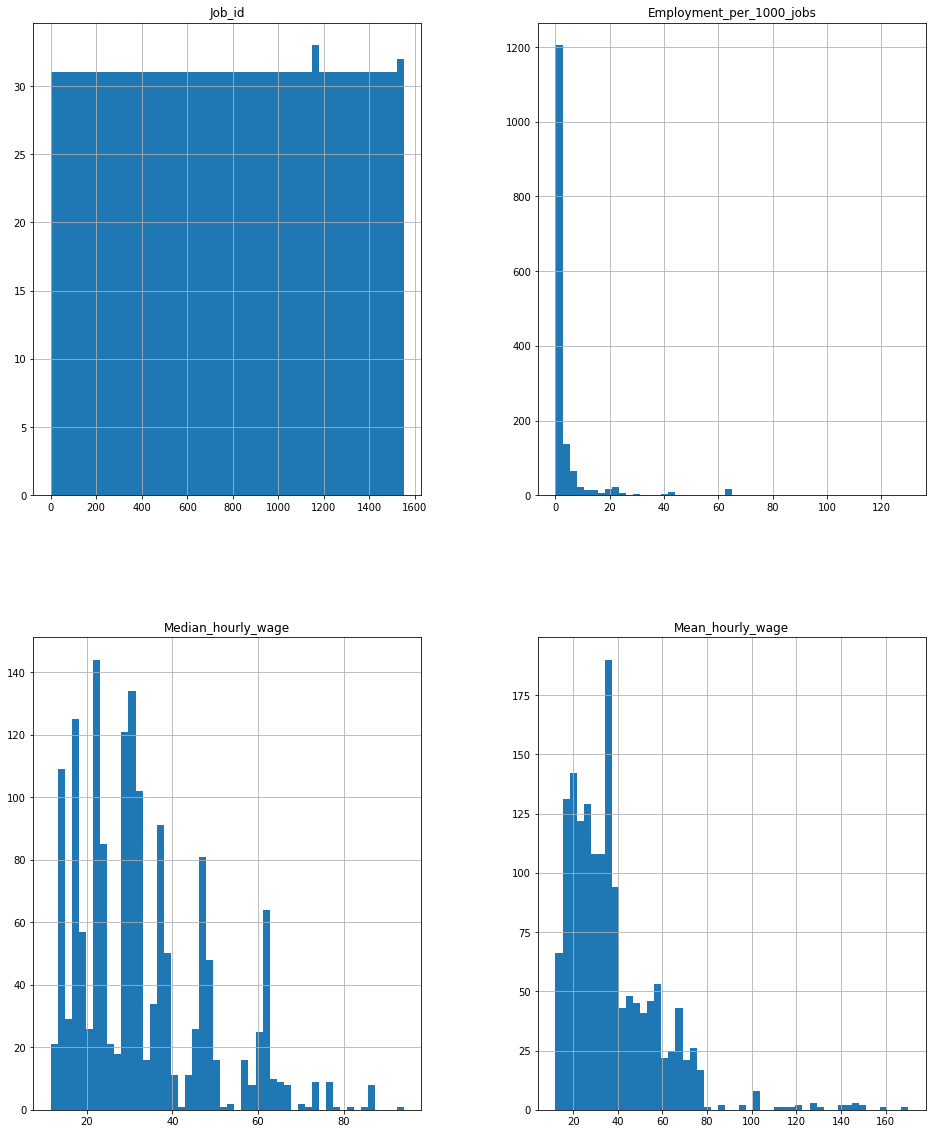

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10)